Model exercises

In [341]:
import pandas as pd
import numpy as np
from acquire import get_telco_data, get_titantic_data
from prepare import train_validate_test_split, prep_telco
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Using titantic

In [474]:
df = get_titantic_data()

Using cached data


In [475]:
df.shape

(891, 13)

In [476]:
df = df.drop(columns = ['passenger_id','deck','embarked','class'])

In [477]:
df.shape

(891, 9)

In [478]:
df = df.dropna()
df.shape

(712, 9)

In [479]:
df = pd.get_dummies(df,columns = ['embark_town','sex'], drop_first=True)

In [480]:
train, validate, test = train_validate_test_split(df, target = 'survived')

In [481]:
train.shape, validate.shape, test.shape

((398, 10), (171, 10), (143, 10))

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [482]:
train.survived.value_counts()

0    237
1    161
Name: survived, dtype: int64

In [483]:
# baseline is most common value - so 0, didn't survive
train['baseline'] = 0

In [484]:
print(f"Baseline accuracy is: {(train.survived==train.baseline).mean():.2%}")

Baseline accuracy is: 59.55%


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [188]:
# Based on exploration believe that pclass, sex, and embark_town are features of interest
selected_features = ['pclass','embark_town_Queenstown','embark_town_Southampton','sex_male']

In [189]:
X_train = train[selected_features]
y_train = train[['survived']]

X_validate = validate[selected_features]
y_validate = validate[['survived']]

X_test = test[selected_features]
y_test = test[['survived']]

In [190]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [191]:
clf = clf.fit(X_train, y_train)

In [192]:
y_pred = clf.predict(X_train)

In [193]:
y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [195]:
print(f"Accuracy score on training set is: {clf.score(X_train, y_train):.2%}")

Accuracy score on training set is: 80.15%


In [196]:
labels = sorted(y_train.survived.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels, columns = labels)

,0,1
0,223,14
1,65,96


In [197]:
# rows are truth, columns are pred
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
(tn, fp, fn, tp)

(223, 14, 65, 96)

In [198]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       237
           1       0.87      0.60      0.71       161

    accuracy                           0.80       398
   macro avg       0.82      0.77      0.78       398
weighted avg       0.81      0.80      0.79       398



4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
- False positive rate: How likely is it we get a false positive when the actual value is negative? FP/(FP+TN)

In [199]:
print(f"False positive rate: {fp/(fp+tn):.2%}")

False positive rate: 5.91%


- False negative rate: How likely is it we get a false negative when the actual value is positive? FN/(FN+TP)

In [200]:
print(f"False negative rate: {fn/(fn+tp):.2%}")

False negative rate: 40.37%


- True positive rate: How likely is it we get a true positive when the actual value is positive? This is sensitivity/recall. TP/(TP+FN)

In [201]:
print(f"True positive rate: {tp/(tp+fn):.2%}")

True positive rate: 59.63%


- True negative rate: How likely is it we get a true positive when the actual value is positive? This is specificity/selectivity. TN/(TN+FP)

In [202]:
print(f"True negative rate: {tn/(fp+tn):.2%}")

True negative rate: 94.09%


5. Run through steps 2-4 using a different max_depth value.

In [209]:
def decision_tree(train, d = 5, print_results = True):
    
    selected_features = ['pclass','embark_town_Queenstown','embark_town_Southampton','sex_male']
    X_train = train[selected_features]
    y_train = train[['survived']]
    clf = DecisionTreeClassifier(max_depth=d, random_state=123)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    if print_results:
        print("TRAINING RESULTS")
        print("----------------")
        print(f"Accuracy score on training set is: {clf.score(X_train, y_train):.2f}")
        print(classification_report(y_train, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

        print(f"False positive rate: {fp/(fp+tn):.2%}")
        print(f"False negative rate: {fn/(fn+tp):.2%}")
        print(f"True positive rate: {tp/(tp+fn):.2%}")
        print(f"True negative rate: {tn/(fp+tn):.2%}")
        print("----------------")
    
    return clf

In [210]:
for i in [3,5]:
    print(f'For decision tree with depth {i}:')
    decision_tree(train, d = i)


For decision tree with depth 3:
TRAINING RESULTS
----------------
Accuracy score on training set is: 0.80
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       237
           1       0.87      0.60      0.71       161

    accuracy                           0.80       398
   macro avg       0.82      0.77      0.78       398
weighted avg       0.81      0.80      0.79       398

False positive rate: 5.91%
False negative rate: 40.37%
True positive rate: 59.63%
True negative rate: 94.09%
----------------
For decision tree with depth 5:
TRAINING RESULTS
----------------
Accuracy score on training set is: 0.80
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       237
           1       0.90      0.58      0.70       161

    accuracy                           0.80       398
   macro avg       0.84      0.77      0.78       398
weighted avg       0.82      0.80      0.79       398

False po

6. Which model performs better on your in-sample data?

### Between decision trees with depth of 3 and 5:
    - with depth 5 accuracy is barely better at 80.4% compared to 80.15%
    - fairly even performance otherwise - higher true negative rate for depth 5 but lower true positive rate
    - depth 5 has better precision but lower recall


7. Which model performs best on your out-of-sample data, the validate set?

In [211]:
def validate_results(d):
    clf = decision_tree(train, d = d, print_results = False)
    print('')
    print(f'For decision tree of depth: {clf.max_depth}')
    print('VALIDATE RESULTS')
    print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
         .format(clf.score(X_validate, y_validate)))
    # And since accuracy isn't everything

    # Produce y_predictions that come from the X_validate
    y_pred = clf.predict(X_validate)

    # Compare actual y values (from validate) to predicted y_values from the model run on X_validate
    print(classification_report(y_validate, y_pred))

In [212]:
for i in [3,5]:
    validate_results(i)



For decision tree of depth: 3
VALIDATE RESULTS
Accuracy of Decision Tree classifier on validate set: 0.78
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       102
           1       0.94      0.49      0.65        69

    accuracy                           0.78       171
   macro avg       0.84      0.74      0.75       171
weighted avg       0.82      0.78      0.76       171


For decision tree of depth: 5
VALIDATE RESULTS
Accuracy of Decision Tree classifier on validate set: 0.77
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       102
           1       0.94      0.46      0.62        69

    accuracy                           0.77       171
   macro avg       0.84      0.72      0.73       171
weighted avg       0.82      0.77      0.75       171



### Depth 3 has slightly better accuracy than depth 5. Precision is equal for the two depths, recall slightly better for depth 3. I'd say depth 3 is slightly better.

In [443]:
telco = get_telco_data()

Using cached data


In [444]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [445]:
telco = prep_telco(telco)

In [446]:
telco['churn_Yes'] = np.select([telco['churn_Yes']==1,telco.churn_Yes == 0],['yes','no'])

In [447]:
telco.churn_Yes.value_counts(normalize=True)

no     0.734215
yes    0.265785
Name: churn_Yes, dtype: float64

In [448]:
# very imbalanced

In [449]:
train, validate, test = train_validate_test_split(telco, target = 'churn_Yes')

In [450]:
train["baseline"] = 'no'

In [463]:
baseline_accuracy = (train.baseline == train.churn_Yes).mean()
print(f"Baseline accuracy: {baseline_accuracy}")

Baseline accuracy: 0.7343154686309372


In [464]:
selected_features = ['senior_citizen','monthly_charges','internet_service_type_Fiber optic']

In [465]:
def X_and_y(train, validate, test, selected_features, target):
    X_train = train[selected_features]
    y_train = train[target]
    
    X_validate = validate[selected_features]
    y_validate = validate[target]
    
    X_test = test[selected_features]
    y_test = test[target]
    
    return {'X_train': X_train, 'y_train': y_train, 'X_validate': X_validate, 'y_validate': y_validate, 'X_test': X_test, 'y_test': y_test}
    

In [466]:
split_data = X_and_y(train, validate, test, selected_features, 'churn_Yes')

In [467]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [468]:
clf = clf.fit(split_data['X_train'],split_data['y_train'])

In [469]:
clf.classes_

array(['no', 'yes'], dtype=object)

[Text(558.0, 428.08500000000004, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = no'),
 Text(279.0, 305.775, 'monthly_charges <= 29.475\ngini = 0.241\nsamples = 2215\nvalue = [1904, 311]\nclass = no'),
 Text(139.5, 183.46500000000003, 'senior_citizen <= 0.5\ngini = 0.167\nsamples = 927\nvalue = [842, 85]\nclass = no'),
 Text(69.75, 61.15499999999997, 'gini = 0.152\nsamples = 892\nvalue = [818, 74]\nclass = no'),
 Text(209.25, 61.15499999999997, 'gini = 0.431\nsamples = 35\nvalue = [24, 11]\nclass = no'),
 Text(418.5, 183.46500000000003, 'monthly_charges <= 57.675\ngini = 0.289\nsamples = 1288\nvalue = [1062, 226]\nclass = no'),
 Text(348.75, 61.15499999999997, 'gini = 0.402\nsamples = 609\nvalue = [439, 170]\nclass = no'),
 Text(488.25, 61.15499999999997, 'gini = 0.151\nsamples = 679\nvalue = [623, 56]\nclass = no'),
 Text(837.0, 305.775, 'monthly_charges <= 88.375\ngini = 0.489\nsamples = 1722\nvalue = [987, 735]\nclass = no'),
 Te

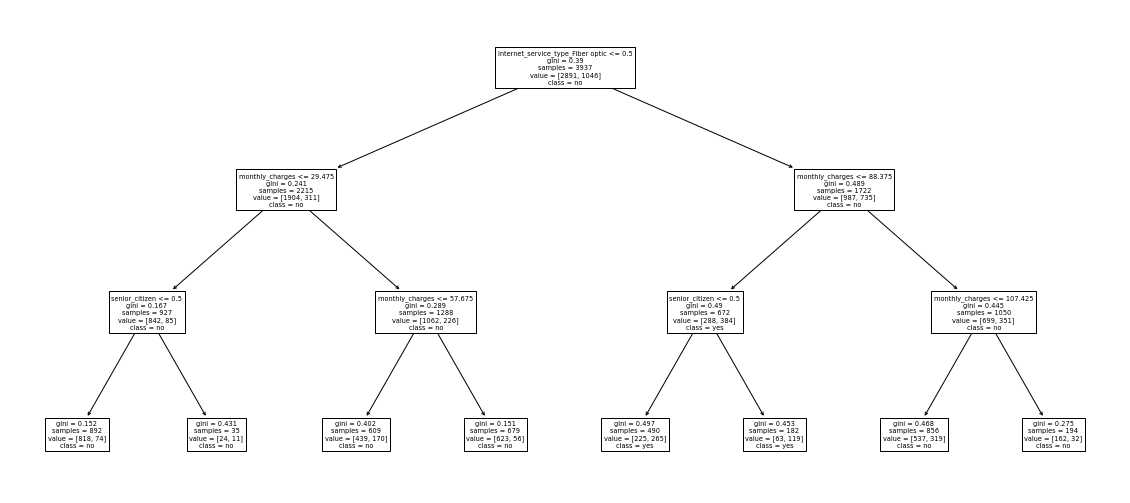

In [470]:
plt.figure(figsize=(20, 9))
plot_tree(clf, feature_names=split_data['X_train'].columns, class_names=clf.classes_)

In [471]:
y_pred = clf.predict(split_data['X_train'])
y_pred[0:5]

array(['no', 'yes', 'no', 'no', 'no'], dtype=object)

In [472]:
y_pred_proba = clf.predict_proba(split_data['X_train'])

In [473]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(split_data['X_train'], split_data['y_train'])))


Accuracy of Decision Tree classifier on training set: 0.76


## This is marginally superior to baseline accuracy

In [120]:
print(classification_report(split_data['y_train'], y_pred))

tn, fp, fn, tp = confusion_matrix(split_data['y_train'], y_pred).ravel()

print(f"False positive rate: {fp/(fp+tn):.2%}")
print(f"False negative rate: {fn/(fn+tp):.2%}")
print(f"True positive rate: {tp/(tp+fn):.2%}")
print(f"True negative rate: {tn/(fp+tn):.2%}")

              precision    recall  f1-score   support

          no       0.80      0.90      0.85      2891
         yes       0.57      0.37      0.45      1046

    accuracy                           0.76      3937
   macro avg       0.68      0.63      0.65      3937
weighted avg       0.74      0.76      0.74      3937

False positive rate: 9.96%
False negative rate: 63.29%
True positive rate: 36.71%
True negative rate: 90.04%


In [227]:
def decision_tree(train, d, print_results, selected_features, target):
    
    X_train = split_data['X_train']
    y_train = split_data['y_train']
    clf = DecisionTreeClassifier(max_depth=d, random_state=123)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    if print_results:
        print("TRAINING RESULTS")
        print("----------------")
        print(f"Max depth: {clf.max_depth}")
        print(f"Features: {selected_features}")
        print(f"Target: {target}")
        print(f"Accuracy score on training set is: {clf.score(split_data['X_train'], split_data['y_train']):.2%}")
        print(classification_report(y_train, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

        print(f"False positive rate: {fp/(fp+tn):.2%}")
        print(f"False negative rate: {fn/(fn+tp):.2%}")
        print(f"True positive rate: {tp/(tp+fn):.2%}")
        print(f"True negative rate: {tn/(fp+tn):.2%}")
        print("----------------")
    
    return clf

In [228]:
decision_tree(train, 3, True, selected_features, target = 'churn_Yes')

TRAINING RESULTS
----------------
Max depth: 3
Features: ['senior_citizen', 'monthly_charges', 'internet_service_type_Fiber optic']
Target: churn_Yes
Accuracy score on training set is: 75.87%
              precision    recall  f1-score   support

          no       0.80      0.90      0.85      2891
         yes       0.57      0.37      0.45      1046

    accuracy                           0.76      3937
   macro avg       0.68      0.63      0.65      3937
weighted avg       0.74      0.76      0.74      3937

False positive rate: 9.96%
False negative rate: 63.29%
True positive rate: 36.71%
True negative rate: 90.04%
----------------


DecisionTreeClassifier(max_depth=3, random_state=123)

In [229]:
for i in [3,5]:
    decision_tree(train, i, True, selected_features, target = 'churn_Yes')

TRAINING RESULTS
----------------
Max depth: 3
Features: ['senior_citizen', 'monthly_charges', 'internet_service_type_Fiber optic']
Target: churn_Yes
Accuracy score on training set is: 75.87%
              precision    recall  f1-score   support

          no       0.80      0.90      0.85      2891
         yes       0.57      0.37      0.45      1046

    accuracy                           0.76      3937
   macro avg       0.68      0.63      0.65      3937
weighted avg       0.74      0.76      0.74      3937

False positive rate: 9.96%
False negative rate: 63.29%
True positive rate: 36.71%
True negative rate: 90.04%
----------------
TRAINING RESULTS
----------------
Max depth: 5
Features: ['senior_citizen', 'monthly_charges', 'internet_service_type_Fiber optic']
Target: churn_Yes
Accuracy score on training set is: 76.40%
              precision    recall  f1-score   support

          no       0.80      0.90      0.85      2891
         yes       0.59      0.38      0.46      1046


### Max depth 5 slightly more accurate, precise, and better recall than max depth 3

In [230]:
def validate_results(d):
    clf = decision_tree(train, d, False, selected_features, target = 'churn_Yes')
    print('')
    print(f'For decision tree of depth: {clf.max_depth}')
    print('VALIDATE RESULTS')
    print('Accuracy of Decision Tree classifier on validate set: {:.2%}'
         .format(clf.score(split_data['X_validate'], split_data['y_validate'])))
    # And since accuracy isn't everything

    # Produce y_predictions that come from the X_validate
    y_pred = clf.predict(split_data['X_validate'])

    # Compare actual y values (from validate) to predicted y_values from the model run on X_validate
    print(classification_report(split_data['y_validate'], y_pred))

for i in [3,5]:
    validate_results(i)




For decision tree of depth: 3
VALIDATE RESULTS
Accuracy of Decision Tree classifier on validate set: 71.92%
              precision    recall  f1-score   support

          no       0.78      0.87      0.82      1239
         yes       0.46      0.31      0.37       449

    accuracy                           0.72      1688
   macro avg       0.62      0.59      0.60      1688
weighted avg       0.69      0.72      0.70      1688


For decision tree of depth: 5
VALIDATE RESULTS
Accuracy of Decision Tree classifier on validate set: 71.74%
              precision    recall  f1-score   support

          no       0.78      0.86      0.82      1239
         yes       0.46      0.32      0.38       449

    accuracy                           0.72      1688
   macro avg       0.62      0.59      0.60      1688
weighted avg       0.69      0.72      0.70      1688



### Dropoff in accuracy from train to validate, bigger dropoff on max depth 5. Max depth 3 more accurate than max depth 5. Similar precision and recall.

# Exercises for Random Forest

In [243]:
df = get_titantic_data()

Using cached data


In [244]:
df.shape

(891, 13)

In [245]:
df = df.drop(columns = ['passenger_id','deck','embarked','class'])

In [246]:
df.shape

(891, 9)

In [247]:
df = df.dropna()
df.shape

(712, 9)

In [248]:
df = pd.get_dummies(df,columns = ['embark_town','sex'], drop_first=True)

In [249]:
train, validate, test = train_validate_test_split(df, target = 'survived')

In [250]:
train.shape, validate.shape, test.shape

((398, 10), (171, 10), (143, 10))

In [251]:
# baseline is most common value - so 0, didn't survive
train['baseline'] = 0

In [252]:
print(f"Baseline accuracy is: {(train.survived==train.baseline).mean():.2%}")

Baseline accuracy is: 59.55%


In [253]:
selected_features = ['pclass','embark_town_Queenstown','embark_town_Southampton','sex_male']

In [388]:
validate

,survived,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
610,0,3,39.0,1,5,31.2750,0,0,1,0
56,1,2,21.0,0,0,10.5000,1,0,1,0
664,1,3,20.0,1,0,7.9250,0,0,1,1
830,1,3,15.0,1,0,14.4542,0,0,0,0
92,0,1,46.0,1,0,61.1750,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
505,0,1,18.0,1,0,108.9000,0,0,0,1
164,0,3,1.0,4,1,39.6875,0,0,1,1
624,0,3,21.0,0,0,16.1000,1,0,1,1
726,1,2,30.0,3,0,21.0000,0,0,1,0


In [408]:
def random_forest(train, validate, selected_features , min_samples_leaf, d, print_results = True):
    
    X_train = train[selected_features]
    y_train = train[['survived']]
    rf = RandomForestClassifier(max_depth=d, min_samples_leaf=min_samples_leaf, random_state=123)
    # Fit
    rf = rf.fit(X_train, y_train['survived'])
    
    # Predict
    y_pred = rf.predict(X_train)
    
    # Results
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    if print_results:
        print("TRAINING RESULTS")
        print("----------------")
        # Feature importance
        print(f"Feature importance:\n{dict(zip(selected_features,rf.feature_importances_))}")
        print(f"Accuracy of random forest classifer on training set: {rf.score(X_train, y_train):.2%}")
        print(classification_report(y_train, y_pred))

        
        print("Confusion matrix: rows are truth, columns are pred")
        print("")
        print(confusion_matrix(y_train, y_pred))
        print("")
        print(f"False positive rate: {fp/(fp+tn):.2%}")
        print(f"False negative rate: {fn/(fn+tp):.2%}")
        print(f"True positive rate: {tp/(tp+fn):.2%}")
        print(f"True negative rate: {tn/(fp+tn):.2%}")
        print("----------------")
    train_report = classification_report(y_train, y_pred, output_dict=True)
    ### Predict for Validate 
    y_pred_val = rf.predict(validate[selected_features])
    ### Classification report
    validate_report = classification_report(validate[['survived']],y_pred_val, output_dict=True)
    if print_results:
        print("VALIDATE RESULTS")
        print("----------------")
        print(classification_report(validate[['survived']],y_pred_val))
    reports = {'train':train_report,'validate':validate_report}
    return reports

In [409]:
random_forest(train,validate,selected_features,1,10,True)

TRAINING RESULTS
----------------
Feature importance:
{'pclass': 0.31157122794183023, 'embark_town_Queenstown': 0.027475321223680762, 'embark_town_Southampton': 0.042824936023002885, 'sex_male': 0.6181285148114861}
Accuracy of random forest classifer on training set: 80.40%
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       237
           1       0.84      0.64      0.73       161

    accuracy                           0.80       398
   macro avg       0.81      0.78      0.79       398
weighted avg       0.81      0.80      0.80       398

Confusion matrix: rows are truth, columns are pred

[[217  20]
 [ 58 103]]

False positive rate: 8.44%
False negative rate: 36.02%
True positive rate: 63.98%
True negative rate: 91.56%
----------------
VALIDATE RESULTS
----------------
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       102
           1       0.82      0.52      0.64        69

{'train': {'0': {'precision': 0.7890909090909091,
   'recall': 0.9156118143459916,
   'f1-score': 0.8476562499999999,
   'support': 237},
  '1': {'precision': 0.8373983739837398,
   'recall': 0.639751552795031,
   'f1-score': 0.7253521126760563,
   'support': 161},
  'accuracy': 0.8040201005025126,
  'macro avg': {'precision': 0.8132446415373245,
   'recall': 0.7776816835705114,
   'f1-score': 0.786504181338028,
   'support': 398},
  'weighted avg': {'precision': 0.8086323710199185,
   'recall': 0.8040201005025126,
   'f1-score': 0.7981814607810177,
   'support': 398}},
 'validate': {'0': {'precision': 0.7401574803149606,
   'recall': 0.9215686274509803,
   'f1-score': 0.8209606986899565,
   'support': 102},
  '1': {'precision': 0.8181818181818182,
   'recall': 0.5217391304347826,
   'f1-score': 0.6371681415929203,
   'support': 69},
  'accuracy': 0.7602339181286549,
  'macro avg': {'precision': 0.7791696492483895,
   'recall': 0.7216538789428815,
   'f1-score': 0.7290644201414385,
   

### Accuracy of 80% is decent, higher precision than recall. High false negative rate. Looks like sex and pclass are important features. Embark town does not look important (surprising?).

In [424]:
depths =[]
min_samples = []
accuracies = []
precisions = []
recalls = []
v_accuracies = []
v_precisions = []
v_recalls = []

for depth in range(10,1,-1):
    for min_sample in range(1,10):
        depths.append(depth)
        min_samples.append(min_sample)
        reports = random_forest(train, validate, selected_features, min_sample, depth, False)
        
        train_report = reports['train']
        accuracies.append(train_report['accuracy'])
        precisions.append(train_report['1']['precision'])
        recalls.append(train_report['1']['recall'])
        
        validate_report = reports['validate']
        v_accuracies.append(validate_report['accuracy'])
        v_precisions.append(validate_report['1']['precision'])
        v_recalls.append(validate_report['1']['recall'])
        
train_results_df= pd.DataFrame(data = {"max_depth":depths,"min_samples_leaf":min_samples,"accuracy":accuracies,"precision":precisions,"recall":recalls})
validate_results_df= pd.DataFrame(data = {"max_depth":depths,"min_samples_leaf":min_samples,"accuracy":v_accuracies,"precision":v_precisions,"recall":v_recalls})



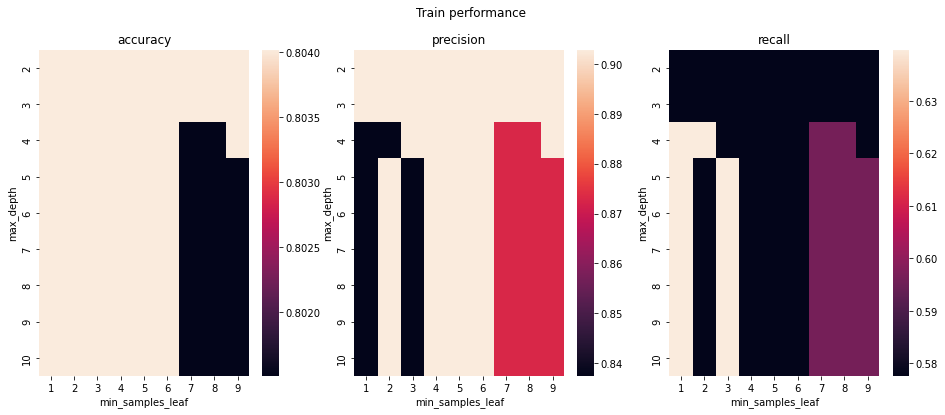

In [440]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    heatmap_df = train_results_df.pivot("max_depth","min_samples_leaf",metric)
    sns.heatmap(heatmap_df, ax=ax[i])
    plt.suptitle('Train performance')
    ax[i].set_title(metric)

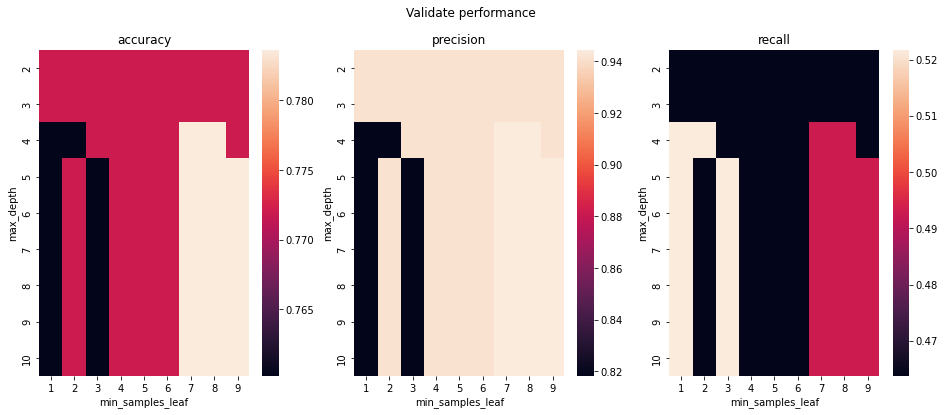

In [439]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    heatmap_df = validate_results_df.pivot("max_depth","min_samples_leaf",metric)
    sns.heatmap(heatmap_df, ax=ax[i])
    plt.suptitle('Validate performance')
    ax[i].set_title(metric)

In [432]:
combined_df = train_results_df.merge(validate_results_df,on=['max_depth','min_samples_leaf'], suffixes=['_train','_validate'])

In [434]:
combined_df["accuracy_diff"] = combined_df.accuracy_validate-combined_df.accuracy_train
combined_df["precision_diff"] = combined_df.precision_validate-combined_df.precision_train
combined_df["recall_diff"] = combined_df.recall_validate-combined_df.recall_train

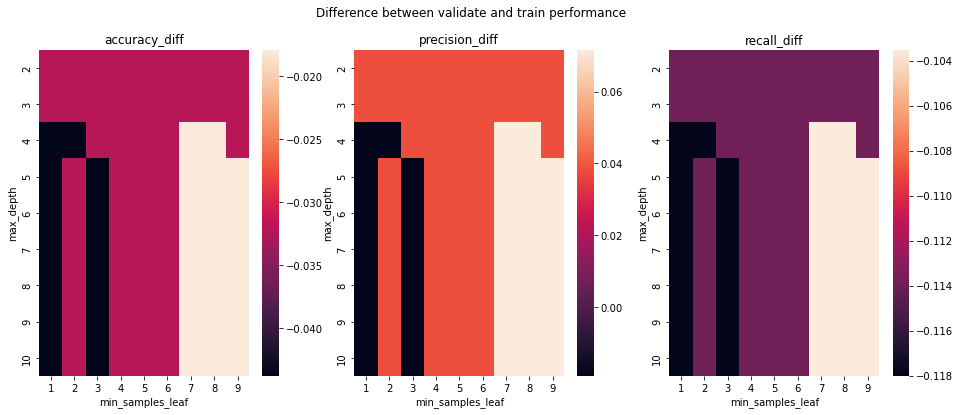

In [438]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy_diff","precision_diff","recall_diff"]
for i, metric in enumerate(to_plot):
    heatmap_df = combined_df.pivot("max_depth","min_samples_leaf",metric)
    sns.heatmap(heatmap_df, ax=ax[i])
    plt.suptitle('Difference between validate and train performance')
    ax[i].set_title(metric)

### For accuracy: minimum dropoff in performance for min_samples_leaf 7-9 and max depth 4-10


# KNN exercises - Use titanic

In [641]:
from sklearn.neighbors import KNeighborsClassifier
from prepare import prep_titantic

In [642]:
df = get_titantic_data()

Using cached data


In [643]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [644]:
prepared = prep_titantic(df)

In [645]:
prepared

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,1,0,1
887,1,1,0,0,30.0000,1,0,0,1
888,0,3,1,2,23.4500,0,0,0,1
889,1,1,0,0,30.0000,1,1,0,0


In [646]:
train, validate, test = train_validate_test_split(prepared,target = 'survived')

In [647]:
train.shape, validate.shape, test.shape

((498, 9), (214, 9), (179, 9))

In [648]:
baseline_accuracy = (train.survived.value_counts().idxmax() == train.survived).mean()

In [649]:
train.columns

Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [650]:
selected_features = ['pclass','sibsp','parch','fare','alone','sex_male','embark_town_Queenstown', 'embark_town_Southampton']

In [651]:
X_train = train[selected_features]

In [652]:
y_train = train['survived']

In [653]:
knn = KNeighborsClassifier()

In [654]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [655]:
y_pred = knn.predict(X_train)

In [656]:
y_pred_proba = knn.predict_proba(X_train)

In [657]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.81


In [658]:
print(confusion_matrix(y_train, y_pred))

[[265  42]
 [ 54 137]]


In [659]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       307
           1       0.77      0.72      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498



In [660]:
def k_nearest(train, selected_features, target, k, validate = None, print_results = True):
    
    X_train = train[selected_features]
    y_train = train[target]
    knn = KNeighborsClassifier(n_neighbors = k)
    # Fit
    knn = knn.fit(X_train, y_train)
    
    # Predict
    y_pred = knn.predict(X_train)
    
    # Results
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    if print_results:
        print("----------------")
        print(f"USING k OF {knn.n_neighbors}")
        print("TRAINING RESULTS")
        print("----------------")
        # Feature importance
        # print(f"Feature importance:\n{dict(zip(selected_features,knn.feature_importances_))}")
        
        print(f"Accuracy of k-nearest neighbors classifer on training set: {knn.score(X_train, y_train):.2%}")
        print(classification_report(y_train, y_pred))

        
        print("Confusion matrix: rows are truth, columns are pred")
        print("")
        print(confusion_matrix(y_train, y_pred))
        print("")
        print(f"False positive rate: {fp/(fp+tn):.2%}")
        print(f"False negative rate: {fn/(fn+tp):.2%}")
        print(f"True positive rate: {tp/(tp+fn):.2%}")
        print(f"True negative rate: {tn/(fp+tn):.2%}")
        print("----------------")
    train_report = classification_report(y_train, y_pred, output_dict=True)
    if validate is not None:
        ### Predict for Validate 
        y_pred_val = knn.predict(validate[selected_features])
        ### Classification report
        validate_report = classification_report(validate[target],y_pred_val, output_dict=True)
        if print_results:
            print("----------------")
            print(f"USING k OF {knn.n_neighbors}")
            print("VALIDATE RESULTS")
            print("-------KNN---------")
            print(classification_report(validate[target],y_pred_val))
    else:
        validate_report = None
    reports = {'train':train_report,'validate':validate_report}
    return reports

In [661]:
r = k_nearest(train, selected_features, 'survived', 5,  print_results= True)

----------------
USING k OF 5
TRAINING RESULTS
----------------
Accuracy of k-nearest neighbors classifer on training set: 80.72%
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       307
           1       0.77      0.72      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498

Confusion matrix: rows are truth, columns are pred

[[265  42]
 [ 54 137]]

False positive rate: 13.68%
False negative rate: 28.27%
True positive rate: 71.73%
True negative rate: 86.32%
----------------


In [662]:
ks =[]
accuracies = []
precisions = []
recalls = []
v_accuracies = []
v_precisions = []
v_recalls = []

for k in range(1,21,1):
    ks.append(k)
    reports = k_nearest(train, selected_features, 'survived', k, validate,  False)

    train_report = reports['train']
    accuracies.append(train_report['accuracy'])
    precisions.append(train_report['1']['precision'])
    recalls.append(train_report['1']['recall'])

    validate_report = reports['validate']
    v_accuracies.append(validate_report['accuracy'])
    v_precisions.append(validate_report['1']['precision'])
    v_recalls.append(validate_report['1']['recall'])
        
train_results_df= pd.DataFrame(data = {"k":ks,"accuracy":accuracies,"precision":precisions,"recall":recalls})
validate_results_df= pd.DataFrame(data = {"k":ks,"accuracy":v_accuracies,"precision":v_precisions,"recall":v_recalls})




In [663]:
# Combine train and validate results to allow for plotting together
combined_df = train_results_df.merge(validate_results_df,on=['k'], suffixes=['_train','_validate'])
combined_df["accuracy_diff"] = combined_df.accuracy_validate-combined_df.accuracy_train
combined_df["precision_diff"] = combined_df.precision_validate-combined_df.precision_train
combined_df["recall_diff"] = combined_df.recall_validate-combined_df.recall_train

In [664]:
# Melt metrics into same column to enable clean plotting with seaborn
data = pd.melt(combined_df.drop(columns = ['accuracy_diff','precision_diff','recall_diff']), id_vars =['k'], var_name='metric')

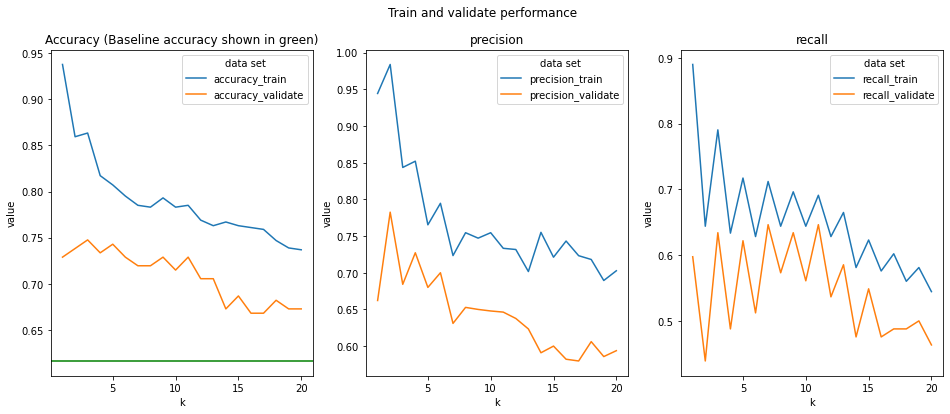

In [665]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    sns.lineplot(x = data[data.metric.str.contains(metric)].k, 
                 y = data[data.metric.str.contains(metric)].value, 
                 hue = data[data.metric.str.contains(metric)].metric,  
                 ax=ax[i])
    plt.suptitle('Train and validate performance')
    ax[i].legend(title = 'data set')
    ax[i].set_title(metric)
    if metric == "accuracy":
        ax[i].set_title('Accuracy (Baseline accuracy shown in green)')
        ax[i].axhline(baseline_accuracy, color = 'green')

## In sample (train):
### - Accuracy and precision are inversely proportional to k setting
### - Recall trends downward as well as k setting increases though there is considerably more vacillation

## Out of sample (validate):
### - Similar accuracy and precision performance as on train
### - Recall trends upward from 1-12 then drops off

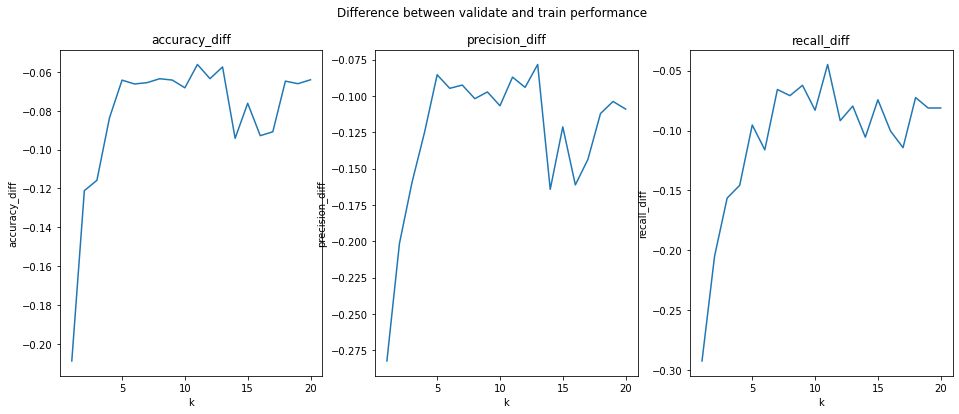

In [666]:
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy_diff","precision_diff","recall_diff"]
for i, metric in enumerate(to_plot):
    sns.lineplot(x = combined_df.k, y = combined_df[metric], ax=ax[i])
    plt.suptitle('Difference between validate and train performance')
    ax[i].set_title(metric)

## Validate performance dropoff:
### - Fairly steady once k > 5
### - lower "shelf" for ~13 < k < 18